<a href="https://colab.research.google.com/github/jacquelinepalumbo/Sprint2_MVP_Machine_and_Deep_Learning/blob/main/ML_Body_Mass_Index_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Machine Learning & Analytics

 Definindo o problema

O dataset utilizado neste notebook possibilitará trabalharmos com modelos de machine learning (aprendizado de máquina), para escolher o melhor modelo para prever o grau de obesidade. Nossos dados são estruturados, onde foram extraídos de um banco de dados da plataforma Kaggle. Trataremos um modelo em aprendizado supervisionado, já que este modelo é construído a partir de um dataset, que são apresentados para um algoritmo na forma de entrada e saída desejada.

Desejamos criar um modelo prever as várias categorias de IMC com base no sexo, altura e peso.


Colunas do dataset:

- Gênero: Masculino Feminino;
- Altura: Número (cm);
- Peso: Número (Kg);
- Índice:
0 - Desnutrido
1 - abaixo do peso
2 - Normal
3 - Excesso de peso
4 - Obesidade
5 - Obesidade Extrema


# COLETA DE DADOS DO DATASET



In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd # importando a biblioteca Pandas
import numpy as np # importando a biblioteca NumPy
import matplotlib.pyplot as plt # importando a biblioteca Matplotlib
import seaborn as sns # importando a biblioteca Seaborn
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # Normalização transformar dimensionando para um determinado intervalo
from sklearn.preprocessing import StandardScaler # Padronização
from sklearn.preprocessing import OneHotEncoder # para transformar dados categóricos em numéricos one-hot encoding e dummy encoding
from sklearn.preprocessing import LabelEncoder # para transformar dados categóricos em numéricos
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import StratifiedKFold # para preparar os folds da validação estratificada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.metrics import confusion_matrix # para a exibição da matriz de confusão
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.ensemble import RandomForestClassifier # algoritmo Random Forest de Classificação
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística
from sklearn.ensemble import BaggingClassifier  # métodos ensemble tipo Bagging
from sklearn.ensemble import ExtraTreesClassifier # métodos ensemble Extra Trees
from sklearn.ensemble import VotingClassifier # métodos ensemble tipo Voting
from sklearn.ensemble import AdaBoostClassifier # métodos ensemble Ada Boost
from sklearn.ensemble import GradientBoostingClassifier # métodos ensemble tipo Boosting
from sklearn.pipeline import Pipeline # para preparar os pipelines
from sklearn.model_selection import GridSearchCV # Hiperparâmetros Grid

In [2]:
# Importando dados de uma url para um dataframe

# url a importar
url_dados = 'https://raw.githubusercontent.com/jacquelinepalumbo/Sprint2_MVP/main/bmi.csv'

# Informa o cabeçalho das colunas
colunas = ['Gender', 'Height', 'Weight', 'Index']

# Carga do dataset através do arquivo csv
df = pd.read_csv(url_dados, names=colunas, skiprows=1, delimiter=',')

# verifica o tipo do dataset
print(type(df))

# exibe as 5 primeiras linhas
df.head()

<class 'pandas.core.frame.DataFrame'>


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
# Exibindo informações sobre o Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None


In [4]:
# Exibindo as dimensões do dataset
df.shape

(500, 4)

In [5]:
# Elimina todas as duplicatas e retorna apenas valores exclusivos da coluna
for col in df.columns:
    print(col, ":", df[col].unique())
    print()

Gender : ['Male' 'Female']

Height : [174 189 185 195 149 147 154 169 159 192 155 191 153 157 140 144 172 151
 190 187 163 179 178 160 197 171 175 161 182 188 181 168 176 196 164 143
 141 193 194 180 165 166 186 198 145 183 177 170 142 199 150 146 148 184
 158 167 156 162 173 152]

Weight : [ 96  87 110 104  61  92 111  90 103  81  80 101  51  79 107 129 145 139
 149  97  67  64  95  62 159 152 121  52  65 131 153 132 114 120 108  56
 118 126  76 122  72 135  54 105 116  89 127  70  88 143  83 158  59  82
 136 117  75 100 154 140 123  50 141 119 156  69 155 160 106  66 157  60
  57 138 115 151 150 147 124  85 125 146  98  84 102  99  78 109  94  74
  73 134 137 144  93  86 130  58 148  68  71  63  91 142 133  77 128 112
  55  53]

Index : [4 2 3 5 1 0]



In [6]:
# Calculando o IMC
df["BMI"] = round(df["Weight"]/((df["Height"])/100)**2, 2)   # Weight(Kg)/Height(m)^2
df.head()

,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,31.71
1,Male,189,87,2,24.36
2,Female,185,110,4,32.14
3,Female,195,104,3,27.35
4,Male,149,61,3,27.48


De acordo com a Sociedade Brasileira de Cirurgia Bariátrica e Metabólica, a obesidade é classificada utilizando o índice de massa corporal (IMC), que é a relação entre o peso corporal e a estatura. Considera-se sobrepeso quando está acima de 25 Kg/m2 e obesidade se o IMC for maior ou igual a 30 Kg/m2. A classificação da obesidade é feita da seguinte forma: Grau I: IMC entre 30 e 34,9; Grau II: IMC entre 35 e 39,9 e Grau III: (obesidade mórbida): IMC acima de 40.

Classificação:
*   Abaixo de 18,5: abaixo do peso
*   18,5–24,9: peso normal
*   25,0–29,9: pré-obesidade
*   30,0–34,9 : Obesidade classe I
*   35,0–39,9 : Obesidade classe II
*   Acima de 40: Obesidade classe III

In [7]:
# Classificando em 0,1,2,3,4 e 5 os valores do BMI de acordo com os índices de massa coporal
def index(x):
    if x["BMI"] <18.5:
        return 0
    elif 18.5<= x["BMI"] < 25:
        return 1
    elif 25<= x["BMI"] < 30:
        return 2
    elif 30<= x["BMI"] < 35:
        return 3
    elif 35<= x["BMI"] < 40:
        return 4
    elif x["BMI"] >= 40:
        return 5
df["New_Index"] = df.apply(index, axis=1)
df.head()

,Gender,Height,Weight,Index,BMI,New_Index
0,Male,174,96,4,31.71,3
1,Male,189,87,2,24.36,1
2,Female,185,110,4,32.14,3
3,Female,195,104,3,27.35,2
4,Male,149,61,3,27.48,2


In [8]:
# Definindo classes categoricas para os números representados
def status(x):
    if x["New_Index"] == 0:
        return "Underweight"      # 0 = Sobrepeso
    elif x["New_Index"] == 1:
        return "Normal weight"    # 1 = Normal
    elif x["New_Index"] == 2:
        return "Pre-Obesity"      # 2 = Pré-Obeso
    elif x["New_Index"] == 3:
        return "Obese Class I"    # 3 = Obesidade I
    elif x["New_Index"]== 4:
        return "Obese Class II"   # 4 = Obesidade II
    elif x["New_Index"] == 5:
        return "Obese Class III"  # 5 = Obesidade III
df["Classification"] = df.apply(status, axis=1)
df.head()

,Gender,Height,Weight,Index,BMI,New_Index,Classification
0,Male,174,96,4,31.71,3,Obese Class I
1,Male,189,87,2,24.36,1,Normal weight
2,Female,185,110,4,32.14,3,Obese Class I
3,Female,195,104,3,27.35,2,Pre-Obesity
4,Male,149,61,3,27.48,2,Pre-Obesity


A partir dos novos dados, usaremos essa nova classificação para tratar o problema do dataset

In [9]:
# Removendo antigada coluna [Index] do dataset
df.drop(["Index"],axis=1,inplace = True)

# Análise Exploratória e Pré Processamento de *Dados*

In [37]:
# Exibindo as 5 primeiras linhas do dataset
df.head()

,Gender,Height,Weight,BMI,New_Index,Classification
0,Male,174,96,31.71,3,Obese Class I
1,Male,189,87,24.36,1,Normal weight
2,Female,185,110,32.14,3,Obese Class I
3,Female,195,104,27.35,2,Pre-Obesity
4,Male,149,61,27.48,2,Pre-Obesity


In [38]:
# Exibindo as 5 últimas linhas do dataset
df.tail()

,Gender,Height,Weight,BMI,New_Index,Classification
495,Female,150,153,68.00,5,Obese Class III
496,Female,184,121,35.74,4,Obese Class II
497,Female,141,136,68.41,5,Obese Class III
498,Male,150,95,42.22,5,Obese Class III
499,Male,173,131,43.77,5,Obese Class III


In [39]:
# Exibindo informações sobre o Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          500 non-null    object 
 1   Height          500 non-null    int64  
 2   Weight          500 non-null    int64  
 3   BMI             500 non-null    float64
 4   New_Index       500 non-null    int64  
 5   Classification  500 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 23.6+ KB
None


In [40]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
df.describe()

,Height,Weight,BMI,New_Index
count,500.000000,500.000000,500.00000,500.000000
mean,169.944000,106.000000,37.76572,3.336000
std,16.375261,32.382607,13.96555,1.705556
min,140.000000,50.000000,12.75000,0.000000
25%,156.000000,80.000000,27.16750,2.000000
50%,170.500000,106.000000,36.95500,4.000000
75%,184.000000,136.000000,46.38750,5.000000
max,199.000000,160.000000,78.85000,5.000000


In [41]:
# Verificando nulls no dataset
df.isnull().sum()

Gender            0
Height            0
Weight            0
BMI               0
New_Index         0
Classification    0
dtype: int64

Nossa dataset contém as colunas:
- Index:
0 - Extremely Weak
1 - Weak
2 - Normal
3 - Overweight
4 - Obesity
5 - Extreme Obesity

- Gender: Male / Female

- Height: (cm)

- Weight: (Kg)


### **Tratamento de Missing**

<Axes: >

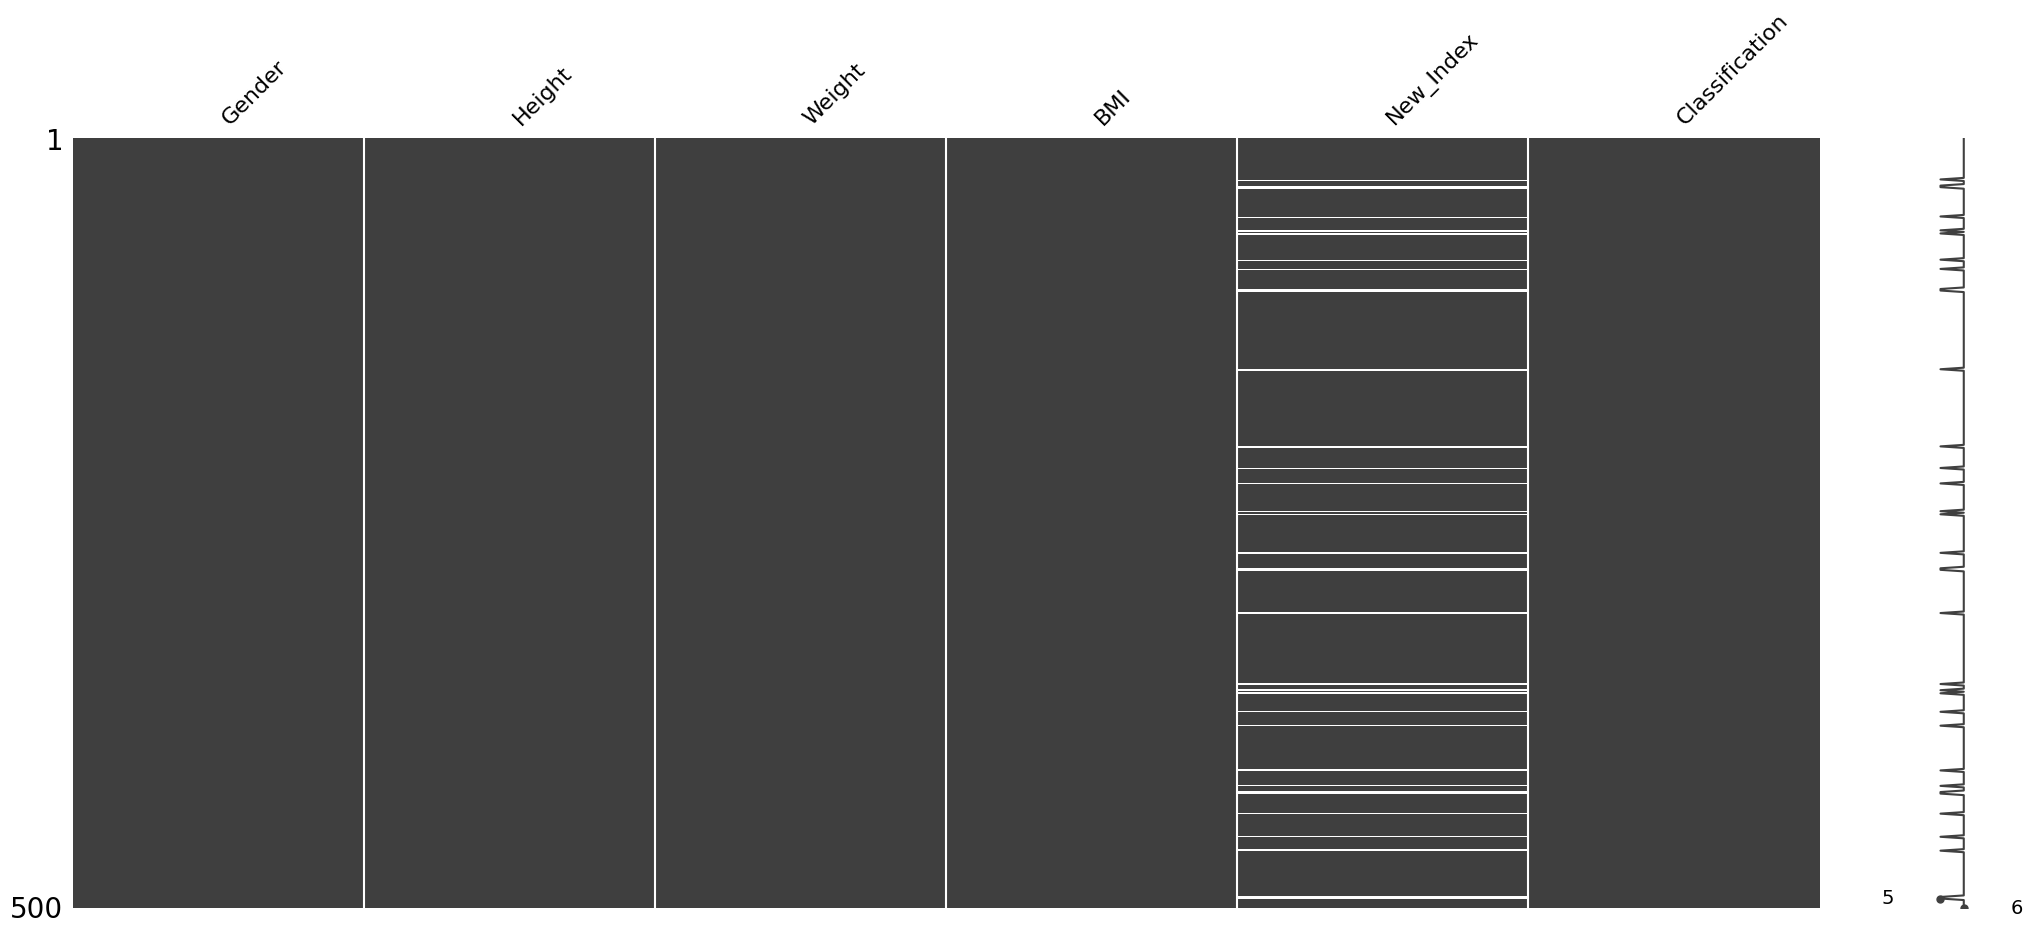

In [42]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(df.columns)

# o novo dataset irá conter todas as colunas do dataset original
datasetSemMissings = df[col[:]]

# substituindo os zeros por NaN
datasetSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

In [43]:
# verificando novamente nulls no dataset
datasetSemMissings.isnull().sum()

Gender             0
Height             0
Weight             0
BMI                0
New_Index         34
Classification     0
dtype: int64

<Axes: >

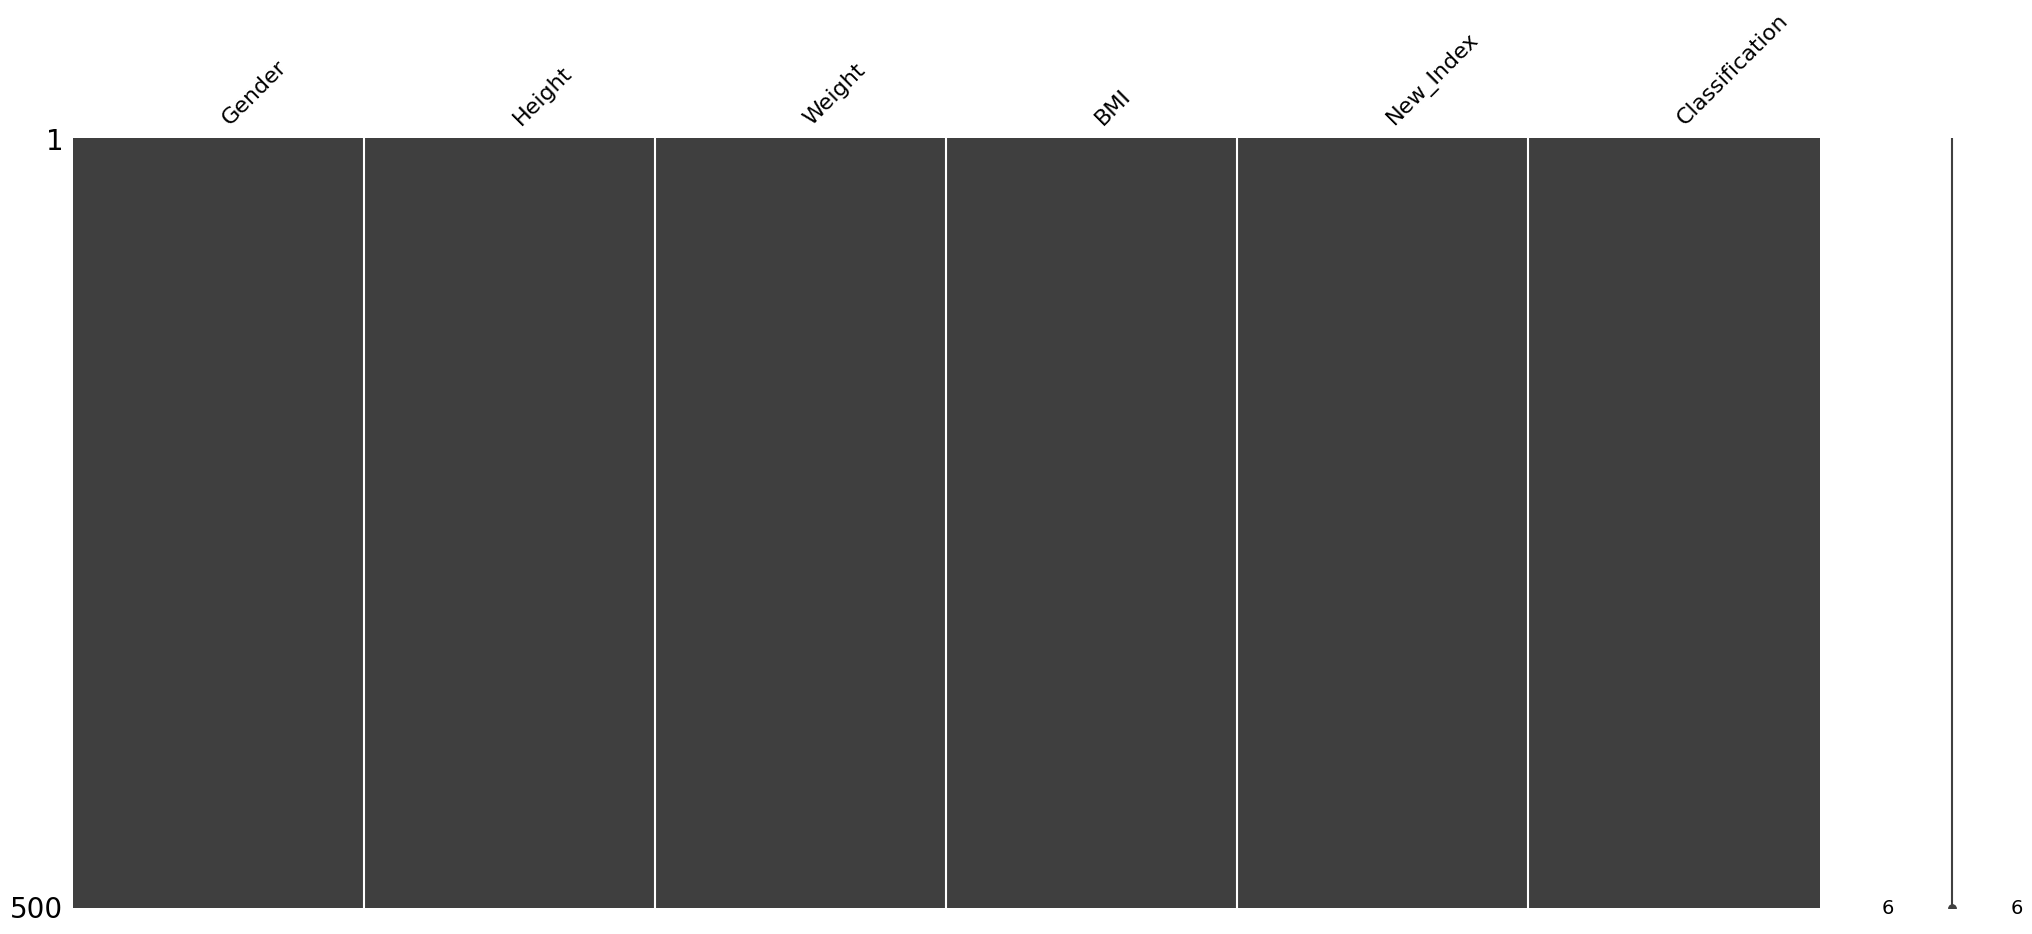

In [44]:
# substituindo os NaN de 'Pregnancies' e 'Outcome' por 0 - voltando aos valores originais destas colunas
datasetSemMissings['New_Index'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

In [45]:
# Exibindo as primeiras linhas
datasetSemMissings.head()

,Gender,Height,Weight,BMI,New_Index,Classification
0,Male,174,96,31.71,3.0,Obese Class I
1,Male,189,87,24.36,1.0,Normal weight
2,Female,185,110,32.14,3.0,Obese Class I
3,Female,195,104,27.35,2.0,Pre-Obesity
4,Male,149,61,27.48,2.0,Pre-Obesity


Nosso dataset contém apenas a coluna New_Index com valores 0, isso mostra que o nosso dataset não apresenta valores missing ou nulos.
Continuaremos trabalhando com os valores originais do dataset.

### Análises exploratórias

In [46]:
# Exibindo os valores da Coluna [Gender]
df['Gender'].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [47]:
# Exibindo os valores da Coluna [Nwe_Index]
df['New_Index'].value_counts()

5    202
2     69
3     65
1     65
4     65
0     34
Name: New_Index, dtype: int64

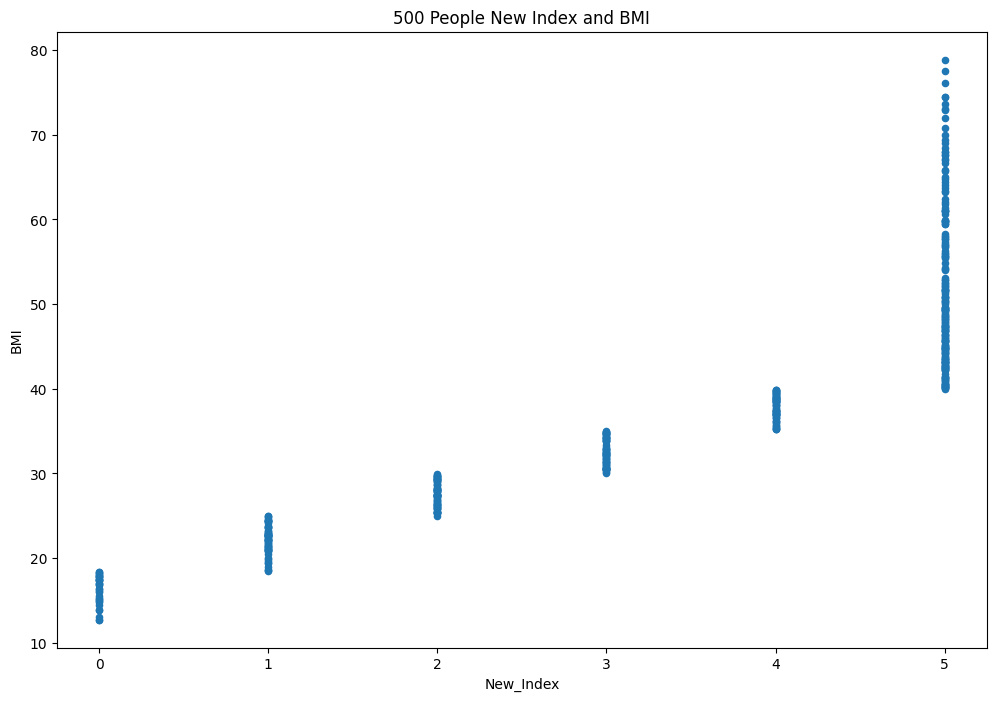

In [48]:
# Gráfico Matplotlib exibindo os valores do IMC x por classificação de 0-5 (Índice = New_Indice)

df.plot(x='New_Index', y='BMI', kind='scatter', # Definindo valores de x e y, tipo gráfico=scatter
        figsize=(12,8), # tamanho do gráfico
        title='500 People New Index and BMI'); # Título

 Os gráficos atribuem a variável Classification um mapeamento de correlação com as demais variáveis do dataset

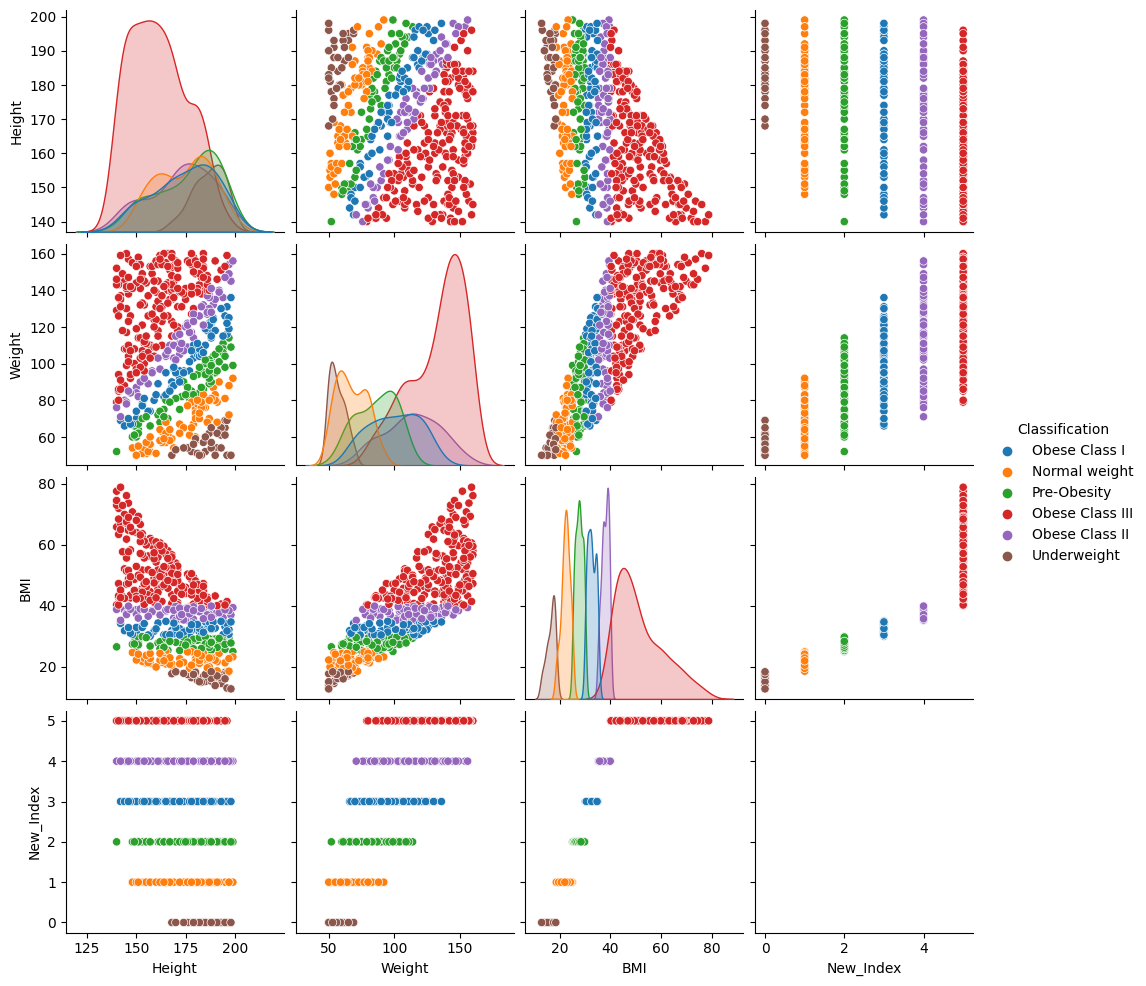

In [49]:
# Gráfico Seaborn
sns.pairplot(df, hue='Classification'); # Hue: perminte os parâmetros de aparência de cor definida para Classification

 Os gráficos atribuem a variável New_Index um mapeamento de correlação com as demais variáveis do dataset

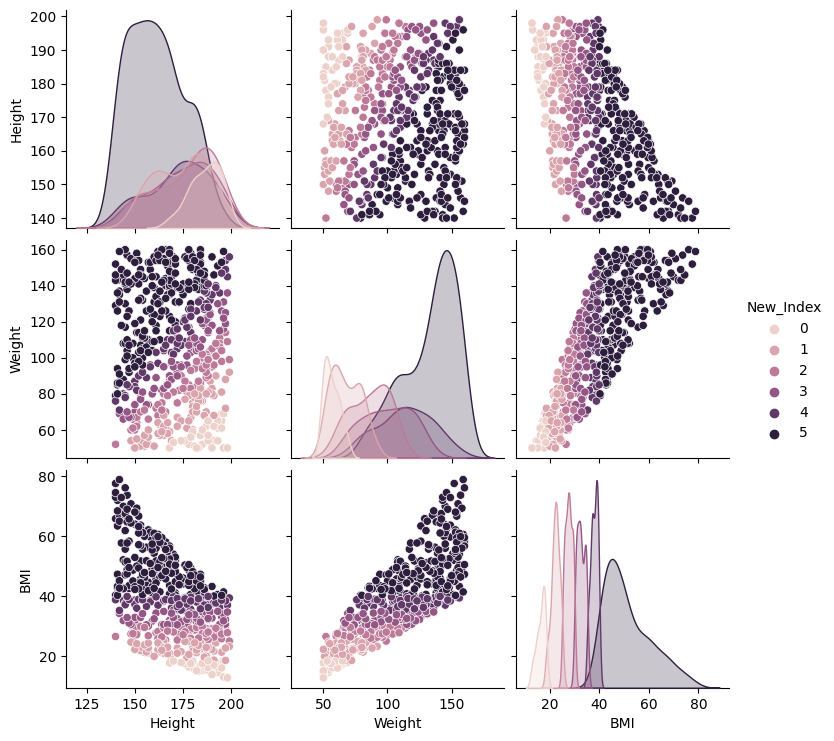

In [50]:
# Gráfico Seaborn
sns.pairplot(df, hue='New_Index') # Hue: perminte os parâmetros de aparência de cor definida para New_Index
plt.show()

Um gráfico muito útil para a análise de dados é o gráfico de correlação, que exibe graficamente as correlações entre os atributos numéricos de um dataset.

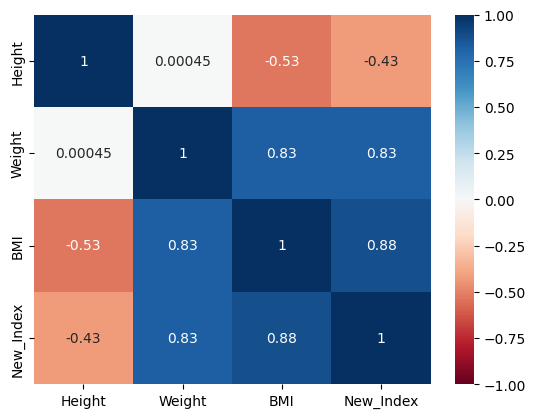

In [51]:
# gráfico de correlação com Seaborn
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Gráfico de pizza mostra a distruiição do sexo do dataset.

Female    255
Male      245
Name: Gender, dtype: int64



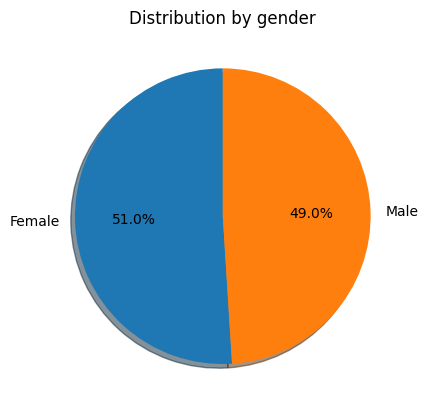

In [52]:
# Gráfico Pizza

print(df["Gender"].value_counts())
print()

label =  "Female", "Male" # nomes
sizes = df["Gender"].value_counts(normalize = True)*100 # inserção dos valores no gráfico,valores com porcentagem

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = label, autopct='%1.1f%%', shadow=True, startangle=90) # ajustes do gráfico
plt.title("Distribution by gender") # título
plt.show(); # Exibindo gráfico

A distribuição das classes são heteregoneas, logo, temos um dataset desbalanceado. Portando, será essencial utilizar a validação cruzada estratificada para que, o modelo testado, com todos os dados do dataset, resulte em melhor aproveitamento do dataset.

Obese Class III    202
Pre-Obesity         69
Obese Class I       65
Normal weight       65
Obese Class II      65
Underweight         34
Name: Classification, dtype: int64



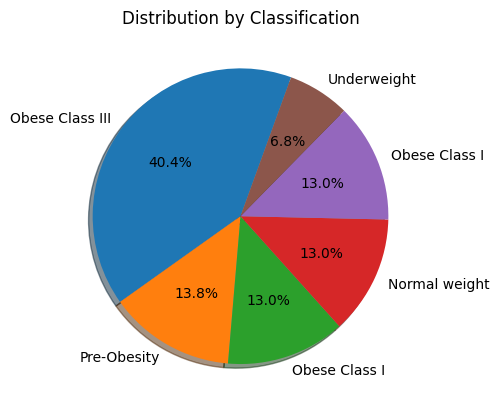

In [53]:
# Gráfico de Pizza
print(df["Classification"].value_counts())
print()

label =  "Obese Class III", "Pre-Obesity", "Obese Class I", "Normal weight", "Obese Class I", "Underweight" # nomes
sizes = df["Classification"].value_counts(normalize = True)*100  # inserção dos valores no gráfico, valores com porcentagem

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = label, autopct="%1.1f%%", shadow=True, startangle=70) # ajustes do gráfico
plt.title("Distribution by Classification") # título
plt.show() # Exibindo o gráfico

Antes de iniciar nosso modelo, precisamos transformar a coluna 'Gender' em uma variável numérica para que possa ser realizado nosso modelo de classificação.



### **Transformação categórica utilizando One Hot Encoder**

In [54]:
df1 = df.copy() # Salvando cópia do dataset original

In [55]:
# Transformação de dados categóricos [Gender] em dados numéricos

# definindo o transformador como one hot encoding
ohe_df = pd.get_dummies(df, columns = ['Gender'])
print(ohe_df)

     Height  Weight    BMI  New_Index   Classification  Gender_Female  \
0       174      96  31.71          3    Obese Class I              0   
1       189      87  24.36          1    Normal weight              0   
2       185     110  32.14          3    Obese Class I              1   
3       195     104  27.35          2      Pre-Obesity              1   
4       149      61  27.48          2      Pre-Obesity              0   
..      ...     ...    ...        ...              ...            ...   
495     150     153  68.00          5  Obese Class III              1   
496     184     121  35.74          4   Obese Class II              1   
497     141     136  68.41          5  Obese Class III              1   
498     150      95  42.22          5  Obese Class III              0   
499     173     131  43.77          5  Obese Class III              0   

     Gender_Male  
0              1  
1              1  
2              0  
3              0  
4              1  
..       

In [56]:
# Exibindo as 5 primeiras linhas do dataset
ohe_df.head()

,Height,Weight,BMI,New_Index,Classification,Gender_Female,Gender_Male
0,174,96,31.71,3,Obese Class I,0,1
1,189,87,24.36,1,Normal weight,0,1
2,185,110,32.14,3,Obese Class I,1,0
3,195,104,27.35,2,Pre-Obesity,1,0
4,149,61,27.48,2,Pre-Obesity,0,1


In [57]:
# Exibindo informações sobre o Dataset
print(ohe_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height          500 non-null    int64  
 1   Weight          500 non-null    int64  
 2   BMI             500 non-null    float64
 3   New_Index       500 non-null    int64  
 4   Classification  500 non-null    object 
 5   Gender_Female   500 non-null    uint8  
 6   Gender_Male     500 non-null    uint8  
dtypes: float64(1), int64(3), object(1), uint8(2)
memory usage: 20.6+ KB
None


In [58]:
# Verificando nulls no dataset
ohe_df.isnull().sum()

Height            0
Weight            0
BMI               0
New_Index         0
Classification    0
Gender_Female     0
Gender_Male       0
dtype: int64

In [59]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
ohe_df.describe()

,Height,Weight,BMI,New_Index,Gender_Female,Gender_Male
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,169.944000,106.000000,37.76572,3.336000,0.510000,0.490000
std,16.375261,32.382607,13.96555,1.705556,0.500401,0.500401
min,140.000000,50.000000,12.75000,0.000000,0.000000,0.000000
25%,156.000000,80.000000,27.16750,2.000000,0.000000,0.000000
50%,170.500000,106.000000,36.95500,4.000000,1.000000,0.000000
75%,184.000000,136.000000,46.38750,5.000000,1.000000,1.000000
max,199.000000,160.000000,78.85000,5.000000,1.000000,1.000000


Para terinar nosso modelo, iremos remover a coluna com as classificações numéricas [New_Index] para treinar nosso modelo

In [60]:
# Removendo antigada coluna [New_Index] do dataset
ohe_df.drop(["New_Index"],axis=1,inplace = True)
ohe_df.head()

,Height,Weight,BMI,Classification,Gender_Female,Gender_Male
0,174,96,31.71,Obese Class I,0,1
1,189,87,24.36,Normal weight,0,1
2,185,110,32.14,Obese Class I,1,0
3,195,104,27.35,Pre-Obesity,1,0
4,149,61,27.48,Pre-Obesity,0,1


In [61]:
# Exibindo as 5 primeiras linhas do dataset
ohe_df.head()

,Height,Weight,BMI,Classification,Gender_Female,Gender_Male
0,174,96,31.71,Obese Class I,0,1
1,189,87,24.36,Normal weight,0,1
2,185,110,32.14,Obese Class I,1,0
3,195,104,27.35,Pre-Obesity,1,0
4,149,61,27.48,Pre-Obesity,0,1


In [62]:
# Exibindo informações sobre o Dataset
print(ohe_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height          500 non-null    int64  
 1   Weight          500 non-null    int64  
 2   BMI             500 non-null    float64
 3   Classification  500 non-null    object 
 4   Gender_Female   500 non-null    uint8  
 5   Gender_Male     500 non-null    uint8  
dtypes: float64(1), int64(2), object(1), uint8(2)
memory usage: 16.7+ KB
None


In [63]:
# Novo dataset com tratamento de dados
ohe_df = ohe_df[['Gender_Female', 'Gender_Male', 'Weight', 'Height', 'BMI', 'Classification']]
print(ohe_df)

     Gender_Female  Gender_Male  Weight  Height    BMI   Classification
0                0            1      96     174  31.71    Obese Class I
1                0            1      87     189  24.36    Normal weight
2                1            0     110     185  32.14    Obese Class I
3                1            0     104     195  27.35      Pre-Obesity
4                0            1      61     149  27.48      Pre-Obesity
..             ...          ...     ...     ...    ...              ...
495              1            0     153     150  68.00  Obese Class III
496              1            0     121     184  35.74   Obese Class II
497              1            0     136     141  68.41  Obese Class III
498              0            1      95     150  42.22  Obese Class III
499              0            1     131     173  43.77  Obese Class III

[500 rows x 6 columns]


# Machine Learning

In [64]:
# Preparação dos dados

test_size = 0.20 # tamanho do conjunto de teste
seed = 13 # semente aleatória

# Separação em conjuntos de treino e teste
array = ohe_df.values
X = array[:,0:5]
y = array[:,5]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy' # métrica de acurácia
num_particoes = 3
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 5)
(400,)
(100, 5)
(100,)


### Criação e avaliação de modelos: linha base

Os métodos ensemble combinam vários modelos de machine learning, o que pode fazer com que os resultados sejam melhores do que quando usamos apenas um modelo. Usaremos:
*   Bagging
*   Boosting
*   Voting

LR: 0.962556 (0.018234)
KNN: 0.905042 (0.015133)
CART: 0.990050 (0.014072)
NB: 0.937568 (0.028800)
SVM: 0.642539 (0.018931)
Bagging: 0.990050 (0.014072)
RF: 0.992537 (0.010554)
ET: 0.945030 (0.017604)
Ada: 0.610014 (0.004975)
GB: 0.990050 (0.014072)
Voting: 0.972525 (0.014112)


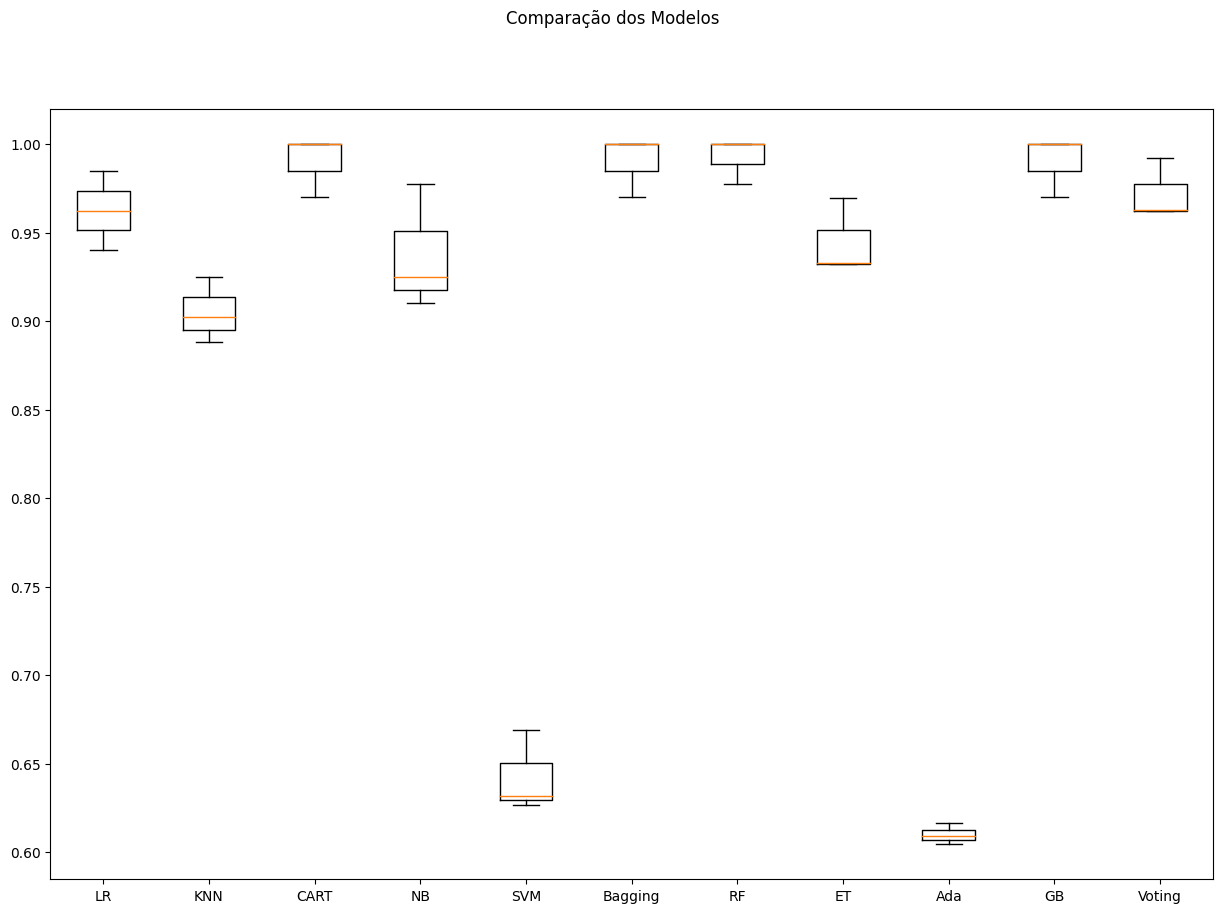

In [65]:
# definindo uma semente global
np.random.seed(13)

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

Utilizaremos pipeline para ajudar a automatizar os fluxos de trabalho de machine learning. Pois permite que uma sequência linear de operações de preparação de dados seja encadeada com o treinamento do modelo.
O objetivo é garantir que todas as etapas do pipeline sejam restritas ao conjunto de dados apropriado (como o conjunto de treino do holdout ou cada fold do procedimento de validação cruzada), permitindo obter uma estimativa justa do desempenho do modelo com dados não vistos.
Utilizando a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados (evitando o data leakage) e comparar o seu resultado com os modelos treinados com o dataset original.

LR-orig: 0.963 (0.018)
KNN-orig: 0.905 (0.015)
CART-orig: 0.990 (0.014)
NB-orig: 0.938 (0.029)
SVM-orig: 0.643 (0.019)
Bag-orig: 0.990 (0.014)
RF-orig: 0.993 (0.011)
ET-orig: 0.945 (0.018)
Ada-orig: 0.610 (0.005)
GB-orig: 0.990 (0.014)
Vot-orig: 0.973 (0.014)
LR-padr: 0.830 (0.033)
KNN-padr: 0.840 (0.024)
CART-padr: 0.990 (0.014)
NB-padr: 0.938 (0.029)
SVM-padr: 0.853 (0.024)
Bag-padr: 0.990 (0.014)
RF-padr: 0.990 (0.003)
ET-padr: 0.943 (0.020)
Ada-padr: 0.610 (0.005)
GB-padr: 0.990 (0.014)
Vot-padr: 0.895 (0.026)
LR-norm: 0.610 (0.037)
KNN-norm: 0.838 (0.018)
CART-norm: 0.990 (0.014)
NB-norm: 0.938 (0.029)
SVM-norm: 0.755 (0.025)
Bag-norm: 0.990 (0.014)
RF-norm: 0.990 (0.009)
ET-norm: 0.948 (0.021)
Ada-norm: 0.610 (0.005)
GB-norm: 0.990 (0.014)
Vot-norm: 0.787 (0.031)


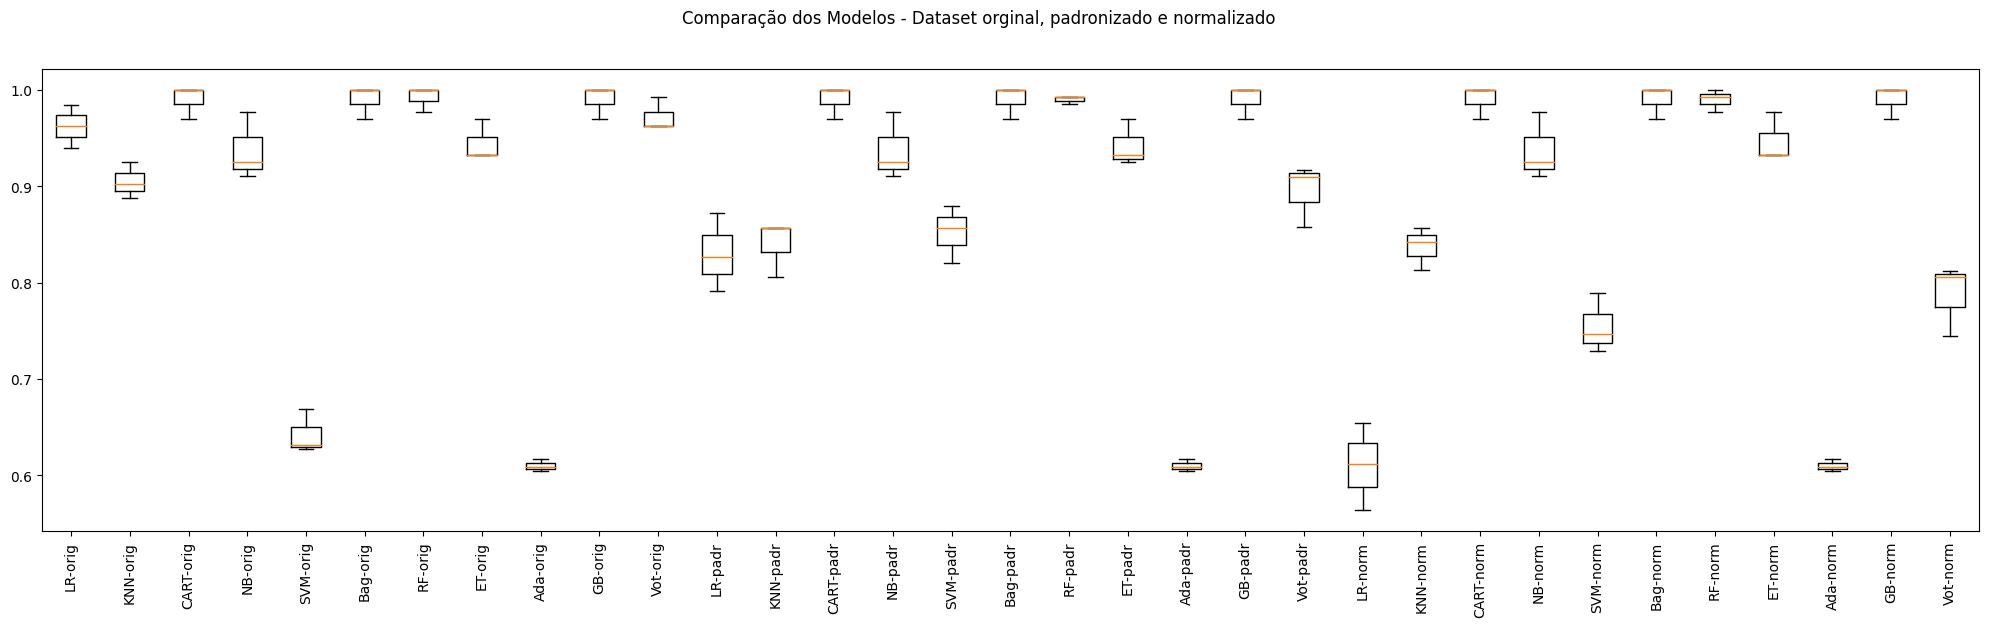

In [66]:
np.random.seed(13) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Conclusão
Utilizando a validação cruzada estratificada para que o modelo treinado, resulte em melhor aproveitamento do dataset.
Resultou em: a Árvore de Classificação CART com os dados padronizados e normalizados apresentaram a melhor acurácia, comparado aos dados orgininais.

# Otimização dos hiperparâmetros

Otimização de hiperparâmetros: realizamos o tuning dos melhores algoritmos encontrados até então, a fim de buscarmos construir o melhor modelo para o problema.
 Usamos o grid search, que nos permite informar em um grid quais hiperparâmetros queremos variar, bem como o conjunto de valores que queremos avaliar para cada um deles.

Executar a otimização dos hiperparâmetros do algoritmo CART, a fim de buscar resultados ainda melhores.
-estimator é o modelo de aprendizado de máquina de interesse, desde que o modelo tenha uma função de pontuação; neste caso, o modelo atribuído é pipeline
-param_grid é um dicionário com nomes de parâmetros (string) como chaves e listas de configurações de parâmetros para tentar como valores.
-scoring: como acurácia.
- cv é o gerador de validação cruzada ou um iterável, neste caso, há uma validação cruzada kfold.

In [67]:
# Definindo a lista de Pipelines
pipelines = [
    Pipeline([
        ('classifier', DecisionTreeClassifier())
    ]),
    Pipeline([
        ('classifier', RandomForestClassifier())
    ]),
    Pipeline([
        ('classifier', SVC())
    ])
]

# Definindo os parâmetros Grid para cada pipelines
param_grids = [
    {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 5, 10, 15],
        'classifier__min_samples_split': [2, 5, 10],
    },
    {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 5, 10],
    },
    {
        'classifier__C': [1, 10, 100],
        'classifier__kernel': ['linear', 'rbf'],
    }
]

# Execute a pesquisa de grade para cada pipeline
for i, pipeline in enumerate(pipelines):
    param_grid = param_grids[i]
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kfold)
    grid_search.fit(X_train, y_train) # Parâmetros treino e teste

    # Print os melhores parâmetros e os melhores score para cada pipeline
    print("Pipeline", i+1)
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)

Pipeline 1
Best Parameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 2}
Best Score:  0.990049751243781
Pipeline 2
Best Parameters:  {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Best Score:  0.9900123442935698
Pipeline 3
Best Parameters:  {'classifier__C': 1, 'classifier__kernel': 'linear'}
Best Score:  0.9600119702240676


### Finalizando o modelo

In [68]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = DecisionTreeClassifier()
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.99


In [69]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

DecisionTreeClassifier()

# Simulando a aplicação do modelo em dados não vistos


In [70]:
# Novos dados - não sabemos a classe!
data = {'Gender_Female':  [1, 0, 0,1],
        'Gender_Male': [1, 0, 0,1],
        'Height': [155, 162, 156, 150],
        'Weight': [72, 84, 98, 48],
        'BMI': [29.97, 32.01, 40.27, 21.33],
       }

atributos = ['Gender_Female', 'Gender_Male', 'Weight', 'Height', 'BMI']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:5].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 0.98019606  1.02020406 -1.05099786 -0.91351013 -0.5587698 ]
 [-1.02020406 -0.98019606 -0.68005744 -0.4856079  -0.41254977]
 [-1.02020406 -0.98019606 -0.24729361 -0.85238124  0.17949798]
 [ 0.98019606  1.02020406 -1.7928787  -1.21915457 -1.17805462]]


In [71]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

['Obese Class I' 'Obese Class I' 'Obese Class III' 'Normal weight']
